In [2]:
# import library
import pandas_datareader as pdr
key = "a7ac4c5065114e18cebde9cdaf3a169ac1770710"

In [4]:
# data collecton
df = pdr.get_data_tiingo("TSLA",api_key=key)

In [5]:
df.to_csv("TSLA.csv")

In [6]:
import pandas as pd

In [7]:
tesla_df = pd.read_csv("TSLA.csv")

In [9]:
tesla_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2015-12-29 00:00:00+00:00,237.19,237.720,229.5470,230.06,2406290,47.438,47.5440,45.90940,46.012,12031450,0.0,1.0
1,TSLA,2015-12-30 00:00:00+00:00,238.09,243.634,235.6707,236.60,3697921,47.618,48.7268,47.13414,47.320,18489605,0.0,1.0
2,TSLA,2015-12-31 00:00:00+00:00,240.01,243.450,238.3700,238.51,2715038,48.002,48.6900,47.67400,47.702,13575190,0.0,1.0
3,TSLA,2016-01-04 00:00:00+00:00,223.41,231.380,219.0000,230.72,6827146,44.682,46.2760,43.80000,46.144,34135730,0.0,1.0
4,TSLA,2016-01-05 00:00:00+00:00,223.43,226.890,220.0000,226.36,3186752,44.686,45.3780,44.00000,45.272,15933760,0.0,1.0


In [10]:
tesla_df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2020-12-18 00:00:00+00:00,695.00,695.0000,628.5400,668.90,222126194,695.00,695.0000,628.5400,668.90,222126194,0.0,1.0
1254,TSLA,2020-12-21 00:00:00+00:00,649.86,668.5000,646.0700,666.24,58045264,649.86,668.5000,646.0700,666.24,58045264,0.0,1.0
1255,TSLA,2020-12-22 00:00:00+00:00,640.34,649.8800,614.2300,648.00,51861644,640.34,649.8800,614.2300,648.00,51861644,0.0,1.0
1256,TSLA,2020-12-23 00:00:00+00:00,645.98,651.4999,622.5701,632.20,33172972,645.98,651.4999,622.5701,632.20,33172972,0.0,1.0
1257,TSLA,2020-12-24 00:00:00+00:00,661.77,666.0900,641.0000,642.99,22865568,661.77,666.0900,641.0000,642.99,22865568,0.0,1.0


In [24]:
tesla_df.shape

(1258, 14)

In [34]:
df1 = tesla_df['close']

In [35]:
df1

0       237.19
1       238.09
2       240.01
3       223.41
4       223.43
         ...  
1253    695.00
1254    649.86
1255    640.34
1256    645.98
1257    661.77
Name: close, Length: 1258, dtype: float64

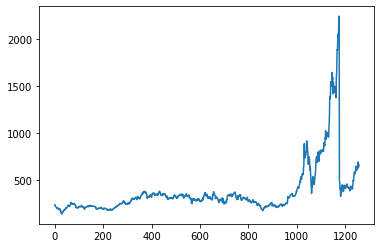

In [36]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
df1

array([[0.04463791],
       [0.04506749],
       [0.04598392],
       ...,
       [0.23706493],
       [0.23975695],
       [0.24729366]])

In [57]:
# splitting the dataser into train and test split
training_size = int(len(df1)*0.65)
test_size  = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [56]:
training_size,test_size

(817, 441)

In [61]:
train_data

array([[0.04463791],
       [0.04506749],
       [0.04598392],
       [0.0380606 ],
       [0.03807015],
       [0.03597476],
       [0.03435668],
       [0.0321372 ],
       [0.03063368],
       [0.03164557],
       [0.02703477],
       [0.02983657],
       [0.02926857],
       [0.0291397 ],
       [0.0262663 ],
       [0.02687248],
       [0.02810394],
       [0.02515894],
       [0.02381293],
       [0.02119251],
       [0.02197052],
       [0.02268648],
       [0.02542624],
       [0.01866754],
       [0.01422857],
       [0.01511159],
       [0.00903545],
       [0.00206197],
       [0.00218607],
       [0.        ],
       [0.0032457 ],
       [0.00351777],
       [0.00548905],
       [0.01193749],
       [0.01102583],
       [0.01093514],
       [0.01626191],
       [0.01600894],
       [0.01686332],
       [0.02088703],
       [0.022276  ],
       [0.02303492],
       [0.02037154],
       [0.02132138],
       [0.02485347],
       [0.0273832 ],
       [0.02941176],
       [0.028

In [63]:
test_data

array([[0.06500468],
       [0.0694532 ],
       [0.06787808],
       [0.07070852],
       [0.05923879],
       [0.06266586],
       [0.0618258 ],
       [0.061401  ],
       [0.0631909 ],
       [0.05954427],
       [0.0592006 ],
       [0.05857056],
       [0.06190217],
       [0.0608855 ],
       [0.06185444],
       [0.05683793],
       [0.05738683],
       [0.05488573],
       [0.04962102],
       [0.04365943],
       [0.0466808 ],
       [0.04535388],
       [0.04312007],
       [0.04793612],
       [0.0531531 ],
       [0.05330107],
       [0.04934895],
       [0.04828933],
       [0.04692422],
       [0.04575004],
       [0.03977891],
       [0.04230865],
       [0.04213682],
       [0.04040896],
       [0.03215152],
       [0.02944518],
       [0.02931153],
       [0.02341677],
       [0.02473414],
       [0.02241442],
       [0.02149321],
       [0.02204689],
       [0.0212641 ],
       [0.01980354],
       [0.016849  ],
       [0.02383203],
       [0.02525918],
       [0.029

In [64]:
# convert an array of values into dataset
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [65]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [66]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [67]:
X_test.shape,y_test.shape

((340, 100), (340,))

In [68]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [75]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), \
          epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 1s 905us/sample - loss: 5.3185e-05 - val_loss: 0.0096
Epoch 2/100
716/716 [==============================] - 0s 464us/sample - loss: 5.0242e-05 - val_loss: 0.0102
Epoch 3/100
716/716 [==============================] - 0s 408us/sample - loss: 4.9286e-05 - val_loss: 0.0098

In [78]:
import tensorflow as tf

In [86]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [87]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [88]:
import math
from sklearn.metrics import mean_squared_error

In [89]:
mean_squared_error(y_train,train_predict)

87393.5191774699

In [90]:
math.sqrt(mean_squared_error(y_train,train_predict))

295.6239489240848

In [91]:
math.sqrt(mean_squared_error(y_test,test_predict))

614.5390035991221

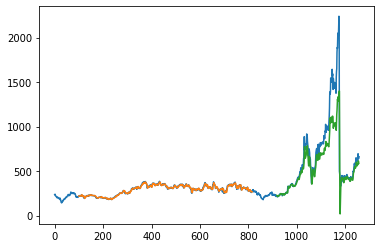

In [93]:

### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [95]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [96]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.21038216]
101
1 day input [0.64241461 0.62481624 0.60852092 0.58743342 0.67352559 0.70514252
 0.71932337 0.80759207 0.83214961 0.82806384 0.88691601 0.90989843
 0.89282032 0.89718292 0.95915192 1.         0.98790022 0.16927755
 0.15817057 0.14495867 0.12568971 0.13109285 0.08903717 0.1062537
 0.10866888 0.10932757 0.13171335 0.14609943 0.14228096 0.13353189
 0.14246711 0.14592283 0.13391374 0.11297421 0.11652061 0.125852
 0.1324675  0.13145083 0.13619528 0.14533574 0.12955114 0.13460584
 0.12902133 0.13442446 0.13472039 0.13857705 0.14253871 0.144615
 0.15160758 0.1456794  0.14128339 0.13706398 0.1328207  0.13315482
 0.13465834 0.13219543 0.13202837 0.13412853 0.12522195 0.1275178
 0.11663994 0.12259198 0.13375623 0.13236249 0.14052924 0.13664395
 0.13249613 0.12729347 0.13052485 0.1279617  0.12640567 0.12620998
 0.14220937 0.16370258 0.16973099 0.16512019 0.18050862 0.19651278
 0.20540027 0.21101342 0.2023455  0.21053611 0.20292781 0.21465051
 0.21735208 0.23774271 0.24161846 0.219

In [97]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [98]:
import matplotlib.pyplot as plt

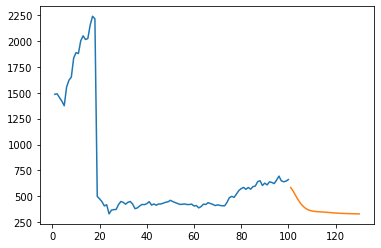

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

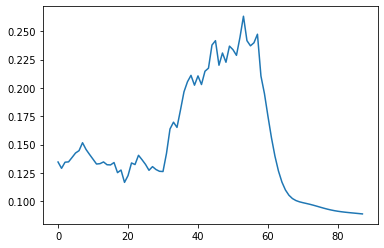

In [100]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [101]:
df3=scaler.inverse_transform(df3).tolist()

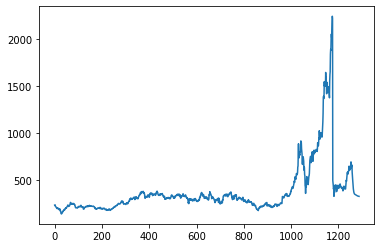

In [102]:
plt.plot(df3)